In [4]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")

In [5]:
from scipy import signal

In [6]:
from src.plot_raw import plot_raw
from matplotlib import pyplot as plt

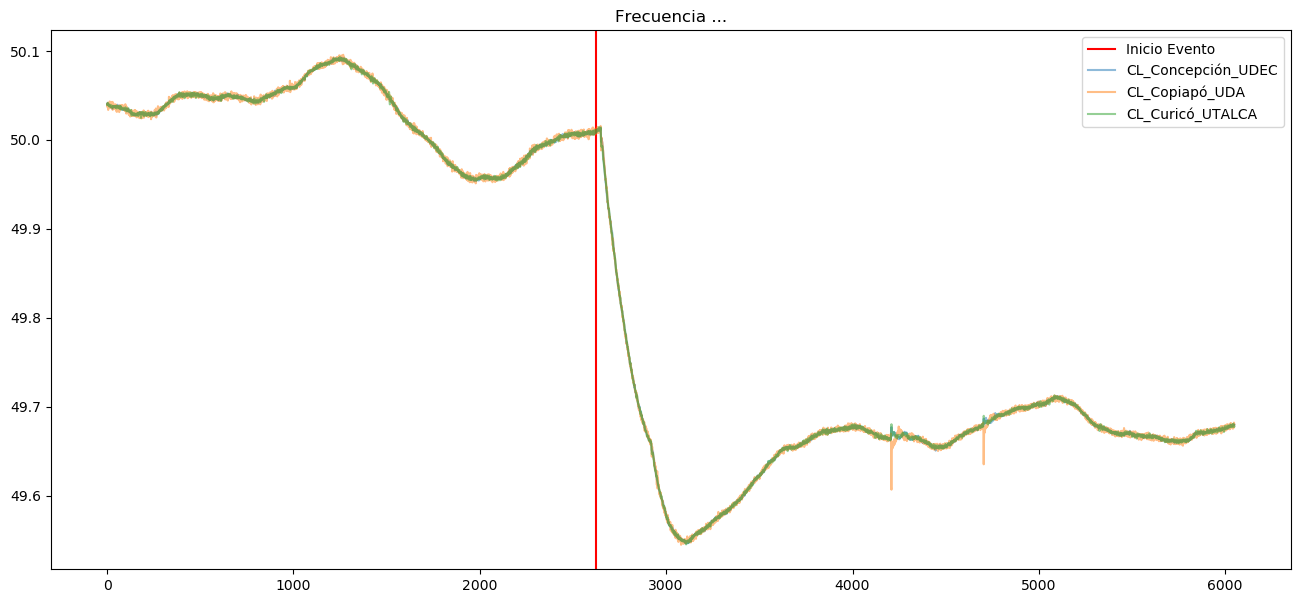

In [7]:
input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

In [16]:
import numpy as np
from src.models import modelo_1

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 0.977
Ts = 0.3

sys_k = modelo_1(Ta,Tb,Tc,Td,K,Kd,Ts)
tiempo = np.arange(0,120,Ts)
Po = 263/1000
potencia = np.repeat(Po, tiempo.size)
sim = signal.dlsim(sys_k, potencia, tiempo, x0 = .1)

In [20]:
sim.

AttributeError: 'tuple' object has no attribute 'plot'

400